# 머신러닝 - 보스턴 집값 예측
* 1978년 보스턴 주 506개 타운들의 집값들을 분석한 후 학습, 예측 수행

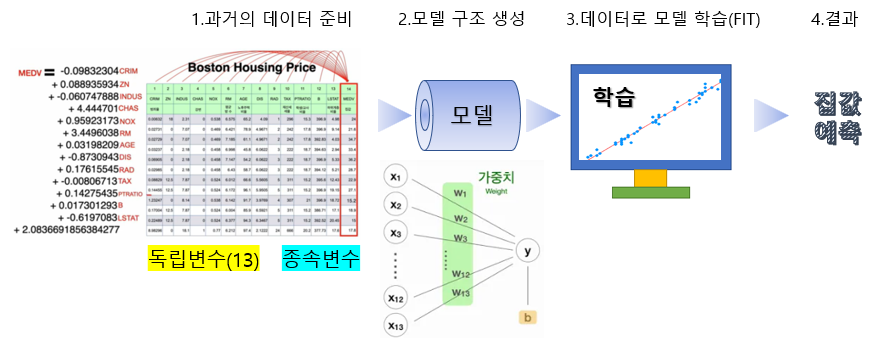    

### 필요한 실습 자료 
> 보스턴 주택가격( [다운로드](https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv)  )(URL) https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv  
> ■사용방법  
> <font color=blue>보스턴 = pd.read_csv(URL)</font>  
> <font color=blue>독립 = 보스턴[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]</font>  
> <font color=blue>종속 = 보스턴[['medv']]</font>  
>    

### 보스턴 자료 분석
* crim : 지역별 범죄 발생율
* zn : 25,000평방피트를 초과하는 거주 지역의 비율
* indus : 비상업 지역 넓이 비율
* chas : 찰스강의 경계에 위치한 경우 1, 그렇지 않다면 0
* nox : 10ppm 당 일산화질소 농도
* rm : 방의 개수 평균
* age : 1940년 이전에 건축된 소유 주택의 비율
* dis : 5개 주요 고용센터까지의 가중 거리
* rad : 고속도로 접근 용이도
* tax : 10,000달러당 재산세율
* ptratio : 지역의 교사와 학생 수 비율
* b : 지역의 흑인 거주 비율
* lstat : 모집단의 하위 계층 비율
* medv : 보스턴 주택가격 중앙값(단위 $1000)


In [68]:
## 관련 라이브러리 추가
import tensorflow as tf      # 머신러닝: tensorflow
import pandas as pd          # 데이터: Pandas                  

In [87]:
##1. 과거의 데이터 준비
보스턴 = pd.read_csv("https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv")  
독립 = 보스턴[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"]]  
종속 = 보스턴[["medv"]]
print('독립변수:',독립.shape, '종속변수:',종속.shape)

독립변수: (506, 13) 종속변수: (506, 1)


In [55]:
보스턴.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 모델 구조

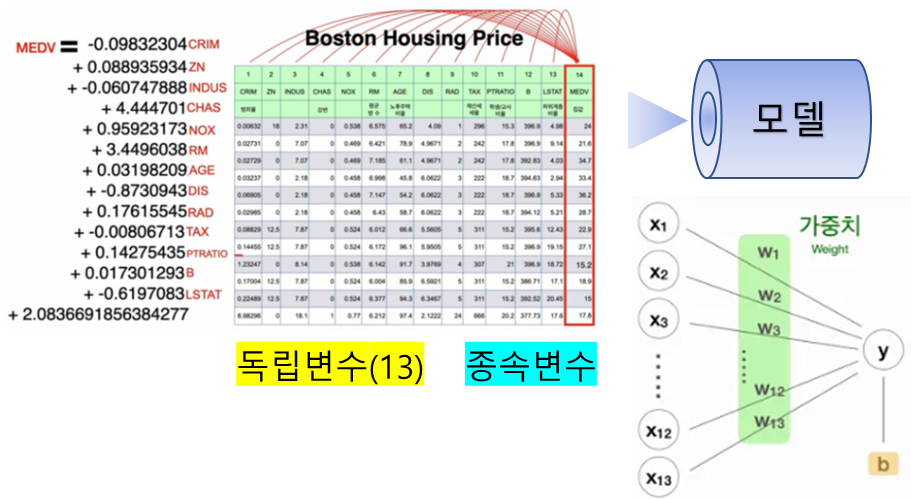   

In [44]:
##2. 모델 구조 생성
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')           # mse, mean square error    

In [45]:
##3. 데이터로 모델 학습(fit)
model.fit(독립, 종속, epochs=3000, verbose=False)   # verbose=False 옵션은 내용보기 안함    
model.fit(독립, 종속, epochs=10)                    # default는 내용보기 

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 30.0982
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 20.9342
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 23.3133
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 21.1421
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 25.5539
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 18.5455
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 20.8808
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 25.9542
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 23.2951
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 24.4192


In [46]:
##4. 모델을 이용하여 예측
##테스트 데이터는 독립  중 일부 
print("보스턴 집값 예측:\n",model.predict(독립[0:5]))      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
보스턴 집값 예측:
 [[30.560596]
 [25.249699]
 [31.811523]
 [30.590822]
 [30.214184]]


In [8]:
종속[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [47]:
## 정보확인 : 가중치
print(model.get_weights())                                                     

[array([[-0.08969813],
       [ 0.05392766],
       [-0.03654354],
       [ 2.7509363 ],
       [ 1.1633599 ],
       [ 5.314525  ],
       [-0.0098867 ],
       [-0.9925089 ],
       [ 0.18075246],
       [-0.00958596],
       [-0.40599632],
       [ 0.01505605],
       [-0.467088  ]], dtype=float32), array([4.0287514], dtype=float32)]


In [48]:
model.get_weights()

[array([[-0.08969813],
        [ 0.05392766],
        [-0.03654354],
        [ 2.7509363 ],
        [ 1.1633599 ],
        [ 5.314525  ],
        [-0.0098867 ],
        [-0.9925089 ],
        [ 0.18075246],
        [-0.00958596],
        [-0.40599632],
        [ 0.01505605],
        [-0.467088  ]], dtype=float32),
 array([4.0287514], dtype=float32)]

## 선형회귀를 이용해 분석 모델 구축

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # 결정계수: 예측분산 / 실측분산
import pandas as pd
import numpy as np

In [91]:
보스턴 = pd.read_csv("https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv")
독립 = 보스턴[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"]]  
종속 = 보스턴[["medv"]]
##1-2. train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(독립,종속,test_size = 0.3, random_state = 156) # train : test = 7 : 3 

In [59]:
##1-2. 선형회귀 분석 모델 생성   
lr = LinearRegression()

In [60]:
##1-2. 학습
lr.fit(X_train,Y_train)    

LinearRegression()

In [61]:
##1-2. 예측
Y_predict = lr.predict(X_test)     

In [62]:
##1-2. 평가
mse = mean_squared_error(Y_test,Y_predict)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test,Y_predict)))          

MSE: 17.297, RMSE: 4.159
R^2(Variance score) : 0.757


In [79]:
##1-2. weights, bias(intercept)
print('Y 절편:',lr.intercept_)
print('회귀 계수:', np.round(lr.coef_,1))                                                 

Y 절편: [40.99559517]
회귀 계수: [[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
   -0.6]]


In [83]:
coef = pd.Series(np.round(lr.coef_,2)[0], index=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"])    
coef.sort_values(ascending = False)

rm          3.35
chas        3.05
rad         0.36
zn          0.07
indus       0.03
age         0.01
b           0.01
tax        -0.01
crim       -0.11
lstat      -0.57
ptratio    -0.92
dis        -1.74
nox       -19.80
dtype: float64

In [93]:
보스턴

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


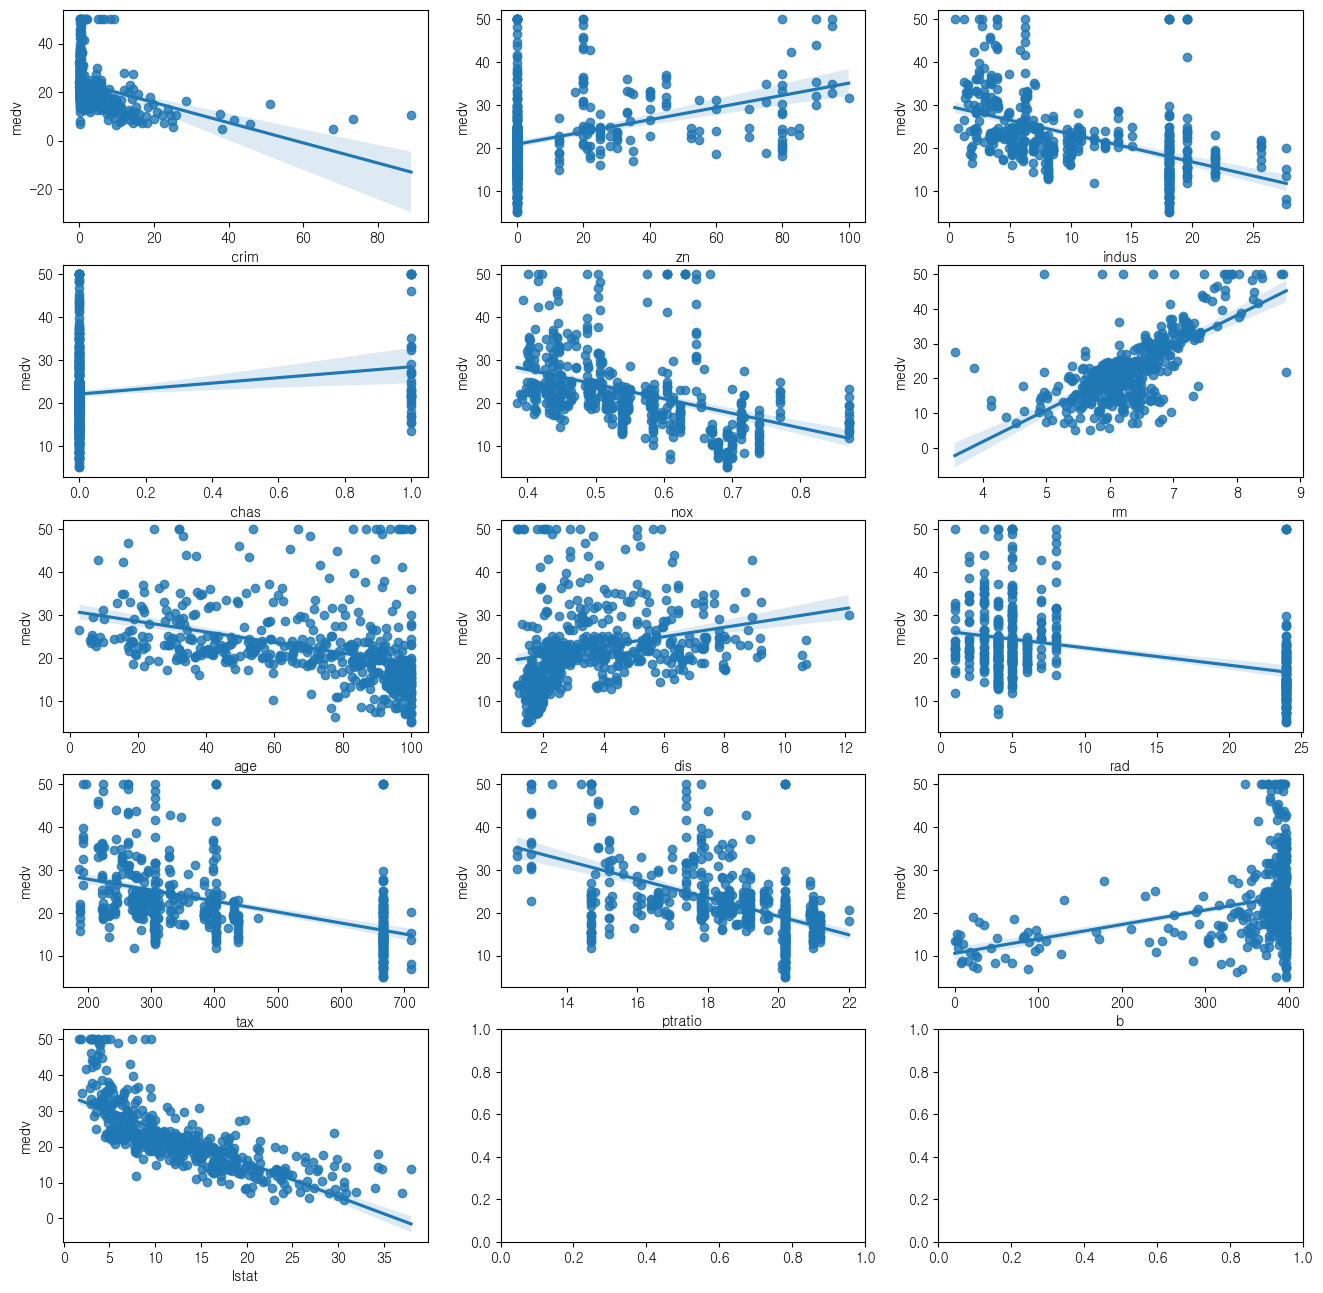

In [94]:
##1-2. 시각화
import matplotlib.pyplot as plt
import seaborn as sns
#한글폰트
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['axes.unicode_minus'] =False
fig, axs = plt.subplots(figsize=(16,16), ncols = 3, nrows = 5)
x_features = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"]   
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y='medv',data=보스턴,ax=axs[row][col])